# Imports

In [1]:
import collections
import re

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import string

import gzip

import copy

# Character and word statistics

Import hungarian dataset from the Europarl corpus

In [2]:
with open("europarl-v7.hu-en.hu") as f:
    data=f.read()

## Character count

Implemented caracter counter function(1.0 version available in my GitHub)

In [12]:
def ccount(data):
    """Counts the caracters of the input data 
    and return with a dictionary"""

    dic = {}  # dictionary for the letters
    # read lines of the data
    for line in data:
        # python 3 reads in unicode, no decode needed
        line = line.rstrip()  # cuts eol character
        
        for letter in line:
            if (dic.get(letter) == None):
                # first of this letter, make new dict row
                dic[letter] = 1
            else:
                dic[letter] += 1
    return dic

In [3]:
let = ccount(data)

Print hungarian letters without collections

In [4]:
# Use the Hungarian letters
hunletters = "aábcdeéfghiíjklmnoóöőpqrstuúüűvwxyz"
for l in hunletters:
    if (let.get(l) != None):
        print(l+'\t'+str(let.get(l)))

a	6840021
á	2886283
b	1387471
c	440233
d	1281426
e	7894051
é	2990777
f	615501
g	2871752
h	1144215
i	3376987
í	436824
j	870237
k	4188091
l	5188434
m	2472473
n	4771358
o	3438481
ó	893015
ö	917330
ő	686808
p	857815
q	614
r	3135243
s	4987457
t	5953707
u	800158
ú	251007
ü	542149
ű	118122
v	1376381
w	4580
x	12050
y	1749436
z	3678700


Store all character count in reversed order

In [5]:
with open("ccount1.txt",'w') as f:
    for l in sorted(let, key=let.get, reverse=True):
        f.write(l+'\t'+str(let[l])+'\n')

### Using standard library
* Collections for the counter
* re to delete whitespaces with Regular Expression

In [17]:
import collections
import re

In [7]:
formatedData = re.sub(r"\s+", "", data, flags=re.UNICODE)
formatedData = formatedData.lower()
cCnt = collections.Counter()

for c in formatedData:
    cCnt[c]+=1

In [8]:
with open("ccount2.txt",'w') as f:
    for c in cCnt.most_common():
        f.write(c[0]+'\t'+str(c[1])+'\n')

### Visualization
* Using matplotlib for the visualisation
* Using numpy for the array manipulation

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

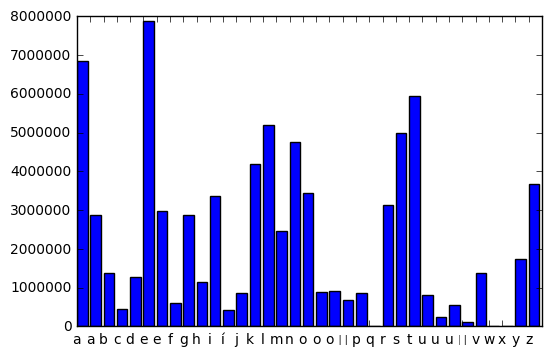

In [9]:
lts = np.ones(35)
for i in range(len(hunletters)):
    lts[i]=let.get(hunletters[i])
    
plt.bar(range(0,35), lts)
plt.xticks(range(0,35), hunletters)
plt.show()

## Word count

Formating the words into set of lowercase strings

In [3]:
words = data.split()
for i in range(len(words)):
    #for w in words: makes a copy and hard to find its origin
    words[i]=words[i].strip()

In [5]:
def wcount(data):
    """Counts the words of the input set 
    and return with a dictionary"""

    dic = {}  # dictionary for the words
    # read rows of the data
    for word in data:
        if (dic.get(word) == None):
            # first of this word, make new dict row
            dic[word] = 1
        else:
            dic[word] += 1
    return dic

In [12]:
wor = wcount(words)

In [13]:
with open("wcount1.txt",'w') as f:
    for w in sorted(wor, key=wor.get, reverse=True):
        f.write(w+'\t'+str(wor[w])+'\n')

### Using standard library

In [5]:
import collections

In [2]:
def word_counter(data, collector = None):
    """Count the words of the input set and return with a collection"""
    if collector == None:
        wCnt = collections.Counter()
    else:
        wCnt = collector
    for w in data:
        wCnt[w]+=1
    return wCnt

In [6]:
wCnt = word_counter(words)

In [99]:
with open("wcount2.txt",'w') as f:
    for w in wCnt.most_common():
        f.write(w[0]+'\t'+str(w[1])+'\n')

## Text cleaning
* lower the letters
* delete punctuation
* convert numbers to _NUM_ tokens

In [1]:
import string

In [3]:
def cleaning(data):
    """Text cleaning: 
        lower the letters
        punctuation
        numbers to _NUM_ tokens"""
    formated_data = data.lower()
    #remove elements in string.punctation with regex
    formated_data = re.sub('['+string.punctuation+']', '', formated_data)
    #replace 1..n number with regex
    formated_data = re.sub('['+string.digits+']+','_NUM_',formated_data)
    return formated_data

In [5]:
text = "Mit sütsz kis szűcs, tán sós 99 húst sütsz kis 1 2 3 szűcs? Egyszer 1 királyfi, elment 4e5 kapálni! To-to-roo! Steins;Gate"
cleaning(text)

'mit sütsz kis szűcs tán sós _NUM_ húst sütsz kis _NUM_ _NUM_ _NUM_ szűcs egyszer _NUM_ királyfi elment _NUM_e_NUM_ kapálni totoroo steinsgate'

In [9]:
data2=cleaning(data)

### Character count

In [10]:
data2_c = re.sub('_NUM_','0',data2)

In [13]:
let2 = ccount(data2)

with open("ccount_formated.txt",'w') as f:
    for l in sorted(let2, key=let2.get, reverse=True):
        f.write(l+'\t'+str(let2[l])+'\n')

### Word count

In [12]:
words2 = data2.split()

In [13]:
for i in range(len(words2)):
    #for w in words: makes a copy and hard to find its origin
    words2[i]=words2[i].strip()
    
wor2= wcount(words2)
with open("wcount_formated.txt",'w') as f:
    for w in sorted(wor2, key=wor2.get, reverse=True):
        f.write(w+'\t'+str(wor2[w])+'\n')

## Long tail
Replace rare words with tokens

In [14]:
def remove_rare(data, rare_threshold=5,rare_token="_RARE_"):
    """Replace rare words with token"""
    data_count = wcount(data)
    
    
    for i in range(len(data)):
        if data_count[data[i]]<rare_threshold:
            data[i]=rare_token
        
    return data

In [15]:
asd = "A A A A A A A A A B B B B B C C D D D D D D E F F GGG GGG GGG GGG GGG"
asd_split = asd.split()
for i in range(0,12000):
    asd_split.append("K")

In [16]:
remove_rare(asd_split);

### Word count with long tail replacement

In [17]:
words3 = remove_rare(words2)

wor3= wcount(words3)
with open("wcount_replaced.txt",'w') as f:
    for w in sorted(wor3, key=wor3.get, reverse=True):
        f.write(w+'\t'+str(wor3[w])+'\n')

In [110]:
len(data2)

93513264

## Dictionary coverage

count the known words in the data according to the dictionary

In [9]:
def coverage(data, dictionary):
    """Count the dictionary's words in the data"""
    known_words=0
    words=0
    for w in data:
        words+=1
        if dictionary.get(w) != None:
            known_words+=1
    return [known_words, words]

In [83]:
alma = ["a","alma","alma","banán","körte","narancs","a","a","a","alma","baba","baba","a","a","a","a","a","a"]

In [42]:
used_words = {k:v for k, v in wCnt.most_common(2)}
coverage(alma,used_words)

[7, 12]

* We want to see the coverage of different depth of the dictionary.
* Using collections.Counter to select the most common words

In [10]:
def coverage_most_common(data, dictionary_counter, number):
    """Count the most common words coverage in the data"""
    
    used_words = {k:v for k,v in dictionary_counter.most_common(number)}
    return coverage(data,used_words)

In [11]:
x_val = []
y_val = []
i = 1
while i<len(wCnt):
    tmp = coverage_most_common(words,wCnt,i)
    print(i,tmp[0])
    y_val.append(i)
    x_val.append(tmp[0])
    
    i=int((i+1)*1.7)

1 931936
3 1781486
6 2309868
11 2705978
20 3061439
35 3426924
61 3859319
105 4370266
180 4938613
307 5537867
523 6154481
890 6794878
1514 7459584
2575 8140316
4379 8809449
7446 9443431
12659 10040117
21522 10579246
36589 11050822
62203 11445683
105746 11763939
179769 12014130
305609 12201346
519537 12415274


In [26]:
max_y=len(words)
max_x=len(word_counter(words))
[max_x,max_y]

[526725, 12422462]

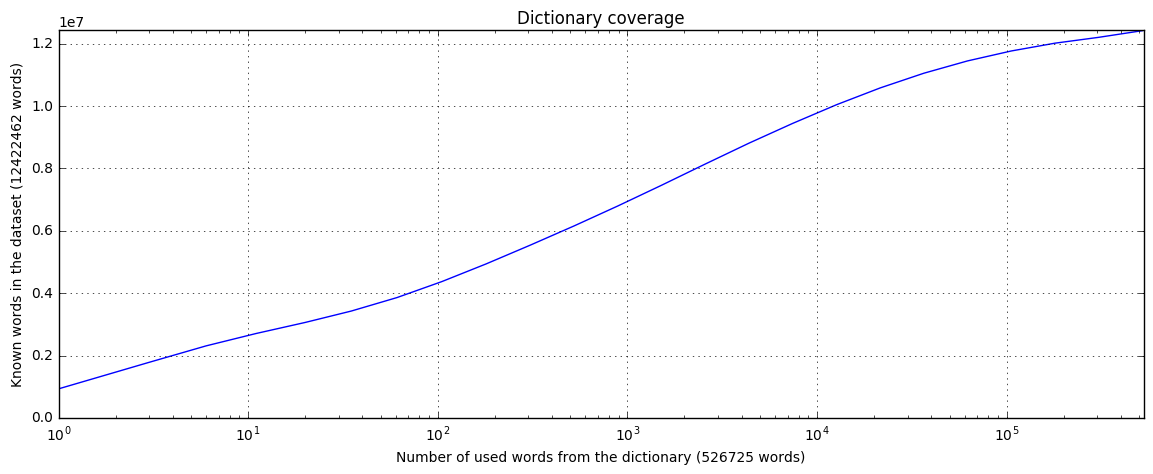

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(y_val,x_val)

plt.xscale('log')
plt.axis([0,max_x, 0, max_y])
plt.xlabel("Number of used words from the dictionary ({} words)".format(max_x))
plt.ylabel("Known words in the dataset ({} words)".format(max_y))
plt.title('Dictionary coverage')
plt.grid(True)
plt.show()

Using the ordered dictionary and the method of commulative addition

In [21]:
def coverage_commulate_sum(data, dictionary_counter):
    """Count coverage with commulated sum"""
    data_counter = word_counter(data)
    x_val = []
    x_val.append(data_counter.get(dictionary_counter[0][0]))
    for i in range(1,len(dictionary_counter)):
        x_val.append(x_val[i-1]+data_counter.get(dictionary_counter[i][0]))
    return x_val

In [4]:
def coverage_commulate_sum_counters(data_counter, dictionary_counter):
    """Calculate the coverage with commulate sum method
    Inputs:
    data_counter: collections.Counter, data
    dictionary_counter: collections.Counter, dictionary
    Outputs:
    x_val: list of numbers"""
    x_val = []
    x_val.append(data_counter.get(dictionary_counter[0][0]))
    for i in range(1,len(dictionary_counter)):
        if data_counter.get(dictionary_counter[i][0])!=None:
            x_val.append(x_val[i-1]+data_counter.get(dictionary_counter[i][0]))
        else:
            x_val.append(x_val[i-1]+0)
    return x_val

In [19]:
dictionary_counter = wCnt.most_common()

In [32]:
comsum = coverage_commulate_sum(words,dictionary_counter)

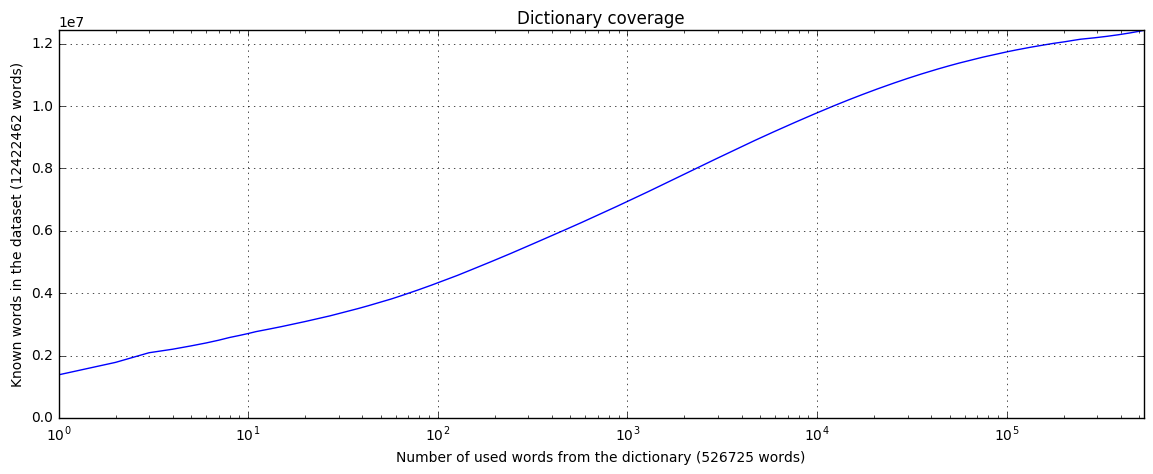

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(comsum)

plt.xscale('log')
plt.axis([0,max_x, 0, max_y])
plt.xlabel("Number of used words from the dictionary ({} words)".format(max_x))
plt.ylabel("Known words in the dataset ({} words)".format(max_y))
plt.title('Dictionary coverage')
plt.grid(True)
plt.show()

### Same in English

In [28]:
with open("europarl-v7.hu-en.en") as f:
    data_en=f.read()

In [30]:
words_en = data_en.split()
dictionary_counter_en = word_counter(words_en).most_common()

In [33]:
comsum_en = coverage_commulate_sum(words_en,dictionary_counter_en)

In [34]:
max_y_en=len(words_en)
max_x_en=len(word_counter(words_en))
[max_x_en,max_y_en]

[148194, 15096547]

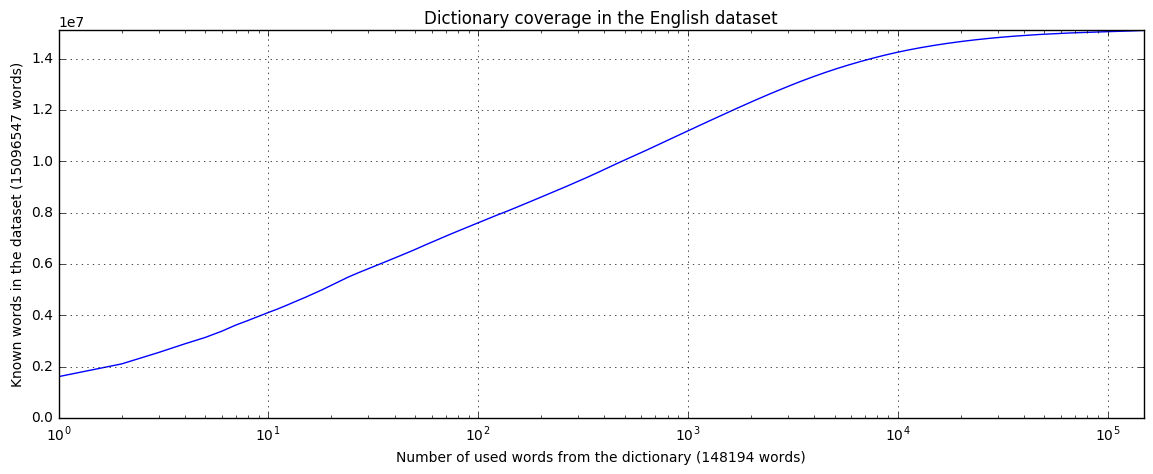

In [36]:
plt.figure(figsize=(14, 5))
plt.plot(comsum_en)

plt.xscale('log')
plt.axis([0,max_x_en, 0, max_y_en])
plt.xlabel("Number of used words from the dictionary ({} words)".format(max_x_en))
plt.ylabel("Known words in the dataset ({} words)".format(max_y_en))
plt.title('Dictionary coverage in the English dataset')
plt.grid(True)
plt.show()

### Same in Danish

In [40]:
with open("europarl-v7.da-en.da") as f:
    data_da=f.read()

### Comparison of the different languages

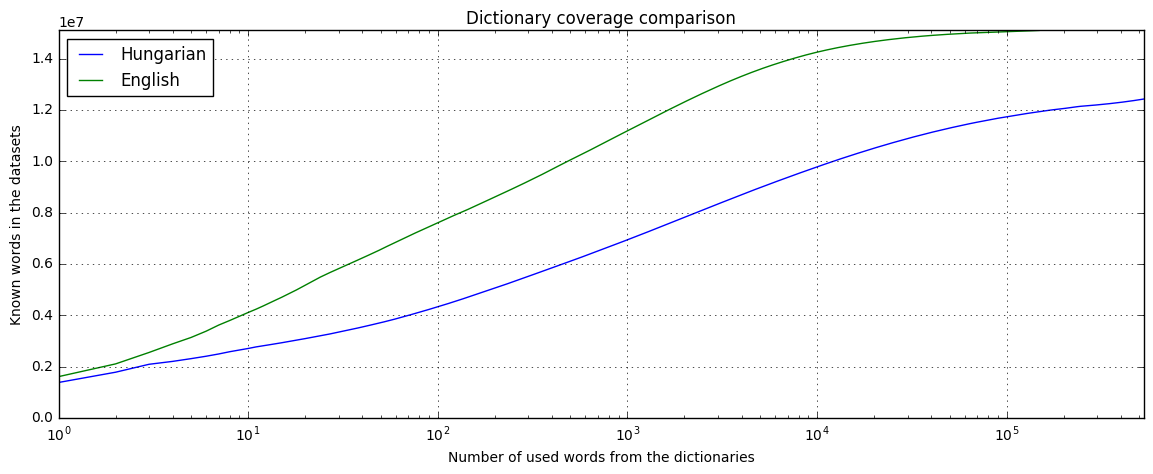

In [39]:
max_x_all = max(max_x,max_x_en)
max_y_all = max(max_y,max_y_en)

plt.figure(figsize=(14, 5))
plt.plot(comsum,label="Hungarian")
plt.plot(comsum_en,label="English")

plt.xscale('log')
plt.axis([0,max_x_all, 0, max_y_all])
plt.xlabel("Number of used words from the dictionaries")
plt.ylabel("Known words in the datasets")
plt.title('Dictionary coverage comparison')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Dictionary coverage between corpora

In [10]:
import gzip

In [9]:
counter_fn_data = collections.Counter()
with gzip.open("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/finnish.tok.gz", 'rb') as f:
    for line in f:
        line = line.decode(errors='ignore')
        cleaned_line = cleaning(line)
        words_in_line = cleaned_line.split()
        word_counter(words_in_line, counter_fn_data)

In [5]:
def counter_from_gz(data, encoding="utf-8", errors="ignore", clean=False, counter=None):
    """Create counter from a .gz path data
    Inputs:
    data: path of the gz file
    encoding: encoding of the file
    errors: error mode in the decoding default: ignore
    clean: make cleaning in the input file
    counter: update default counter or None to make new
    
    Outputs:
    collections.Counter"""
    if counter == None:
        counter_data = collections.Counter()
    else:
        counter_data = counter
    with gzip.open(data, 'rb') as f:
        for line in f:
            line = line.decode(encoding=encoding, errors=errors)
            if "CURRENT URL" in line:
                line = ""
            if clean:
                line = cleaning(line)
            words_in_line = line.split()
            word_counter(words_in_line, counter_data)
    return counter_data
def counter_from_file(data, encoding="utf-8", errors="ignore", clean=False, counter=None):
    """Create counter from a path data
    Inputs:
    data: path of the gz file
    encoding: encoding of the file
    errors: error mode in the decoding default: ignore
    clean: make cleaning in the input file
    counter: update default counter or None to make new
    
    Outputs:
    collections.Counter"""
    if counter == None:
        counter_data = collections.Counter()
    else:
        counter_data = counter
    with open(data, 'rb') as f:
        for line in f:
            line = line.decode(encoding=encoding, errors=errors)
            if "CURRENT URL" in line:
                line = ""
            if clean:
                line = cleaning(line)
            words_in_line = line.split()
            word_counter(words_in_line, counter_data)
    return counter_data

### Finnish

In [8]:
counter_fn_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/fi-en/europarl-v7.fi-en.fi",clean=True)

In [12]:
comm_sum_fn = coverage_commulate_sum_counters(counter_fn_data,counter_fn_dict.most_common())

In [6]:
max_y_fn=sum(counter_fn_data.values())
max_x_fn=len(counter_fn_dict.keys())
print([max_x_fn,max_y_fn])


plt.figure(figsize=(14, 5))
plt.plot(comm_sum_fn)

plt.xscale('log')
plt.axis([0,max_x_fn, 0, max_y_fn])
plt.xlabel("Number of used words from the dictionary ({} words)".format(max_x_fn))
plt.ylabel("Known words in the dataset ({} words)".format(max_y_fn))
plt.title('Dictionary coverage in the Finnish datasets')
plt.grid(True)
plt.show()

NameError: name 'counter_fn_data' is not defined

In [108]:
max_y_fn=sum(counter_fn_data.values())
max_x_fn=len(counter_fn_dict.keys())
print([max_x_fn,max_y_fn])

comm_sum_fn_norm_x=[10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000,750000,1000000] 
comm_sum_fn_norm=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1]
comm_sum_fn_norm[0]=comm_sum_fn[10]/max_y_fn
comm_sum_fn_norm[1]=comm_sum_fn[100]/max_y_fn
comm_sum_fn_norm[2]=comm_sum_fn[1000]/max_y_fn
comm_sum_fn_norm[3]=comm_sum_fn[5000]/max_y_fn
comm_sum_fn_norm[4]=comm_sum_fn[10000]/max_y_fn
comm_sum_fn_norm[5]=comm_sum_fn[25000]/max_y_fn
comm_sum_fn_norm[6]=comm_sum_fn[50000]/max_y_fn
comm_sum_fn_norm[7]=comm_sum_fn[100000]/max_y_fn
comm_sum_fn_norm[8]=comm_sum_fn[250000]/max_y_fn
comm_sum_fn_norm[9]=comm_sum_fn[500000]/max_y_fn
comm_sum_fn_norm[10]=comm_sum_fn[max_x_fn-1]/max_y_fn
comm_sum_fn_norm[11]=comm_sum_fn[max_x_fn-1]/max_y_fn
print(len(comm_sum_fn))

print(comm_sum_fn_norm,comm_sum_fn_norm_x)

[677096, 756337879]
677096
[0.15066968898962152, 0.22869824691141774, 0.34745533748416163, 0.45583699107578346, 0.5142903612262424, 0.5879578483996568, 0.6461724615011646, 0.6999196545595728, 0.7593241009683716, 0.7884611501786227, 0.8033728375516149, 0.8033728375516149] [10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 750000, 1000000]


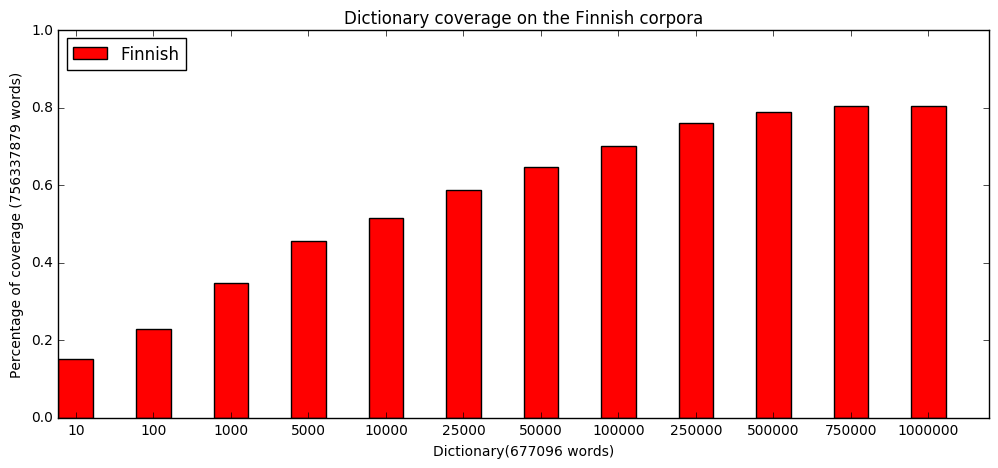

In [109]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm,bar_width, label='Finnish', color='r')
plt.xticks(index+bar_width/2, comm_sum_fn_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_fn))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fn))
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [87]:
comm_sum_fn_reverse = coverage_commulate_sum_counters(counter_fn_dict, counter_fn_data.most_common())

[13970703, 32189332]


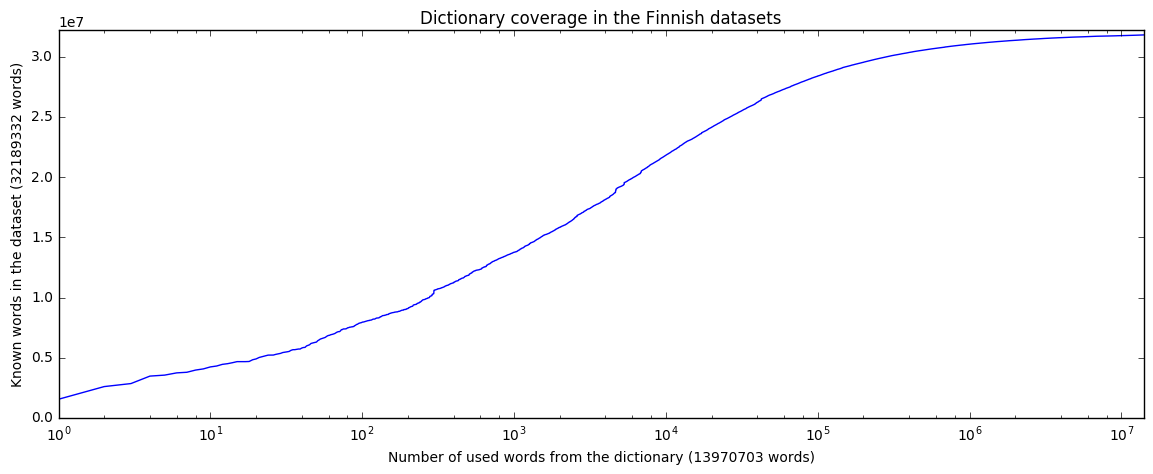

In [89]:
max_y_fn_reverse=sum(counter_fn_dict.values())
max_x_fn_reverse=len(counter_fn_data.keys())
print([max_x_fn_reverse,max_y_fn_reverse])


plt.figure(figsize=(14, 5))
plt.plot(comm_sum_fn_reverse)

plt.xscale('log')
plt.axis([0,max_x_fn_reverse, 0, max_y_fn_reverse])
plt.xlabel("Number of used words from the dictionary ({} words)".format(max_x_fn_reverse))
plt.ylabel("Known words in the dataset ({} words)".format(max_y_fn_reverse))
plt.title('Dictionary coverage in the Finnish datasets')
plt.show()

In [110]:
max_y_fn_reverse=sum(counter_fn_dict.values())
max_x_fn_reverse=len(counter_fn_data.keys())
print([max_x_fn_reverse,max_y_fn_reverse])

comm_sum_fn_norm_x_reverse=[10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000,750000,1000000] 
comm_sum_fn_norm_reverse=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1]
comm_sum_fn_norm_reverse[0]=comm_sum_fn_reverse[10]/max_y_fn_reverse
comm_sum_fn_norm_reverse[1]=comm_sum_fn_reverse[100]/max_y_fn_reverse
comm_sum_fn_norm_reverse[2]=comm_sum_fn_reverse[1000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[3]=comm_sum_fn_reverse[5000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[4]=comm_sum_fn_reverse[10000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[5]=comm_sum_fn_reverse[25000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[6]=comm_sum_fn_reverse[50000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[7]=comm_sum_fn_reverse[100000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[8]=comm_sum_fn_reverse[250000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[9]=comm_sum_fn_reverse[500000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[10]=comm_sum_fn_reverse[750000]/max_y_fn_reverse
comm_sum_fn_norm_reverse[11]=comm_sum_fn_reverse[1000000]/max_y_fn_reverse
print(len(comm_sum_fn_reverse))

print(comm_sum_fn_norm_reverse,comm_sum_fn_norm_x_reverse)

[13970703, 32189332]
13970703
[0.13165734535901522, 0.2470283633099314, 0.4275002662372739, 0.5968082841855805, 0.6780259994211747, 0.7717087760628273, 0.8355445213960948, 0.8823600005119708, 0.9272128418197682, 0.9493732581962248, 0.9590694519538336, 0.9645441850113572] [10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 750000, 1000000]


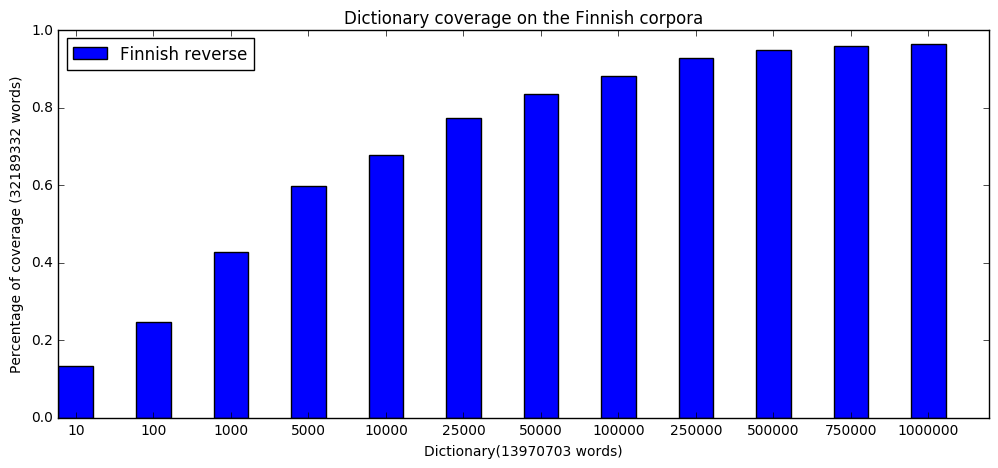

In [111]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm_reverse,bar_width, label='Finnish reverse', color='b')
plt.xticks(index+bar_width/2, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary({} words)'.format(max_x_fn_reverse))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fn_reverse))
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

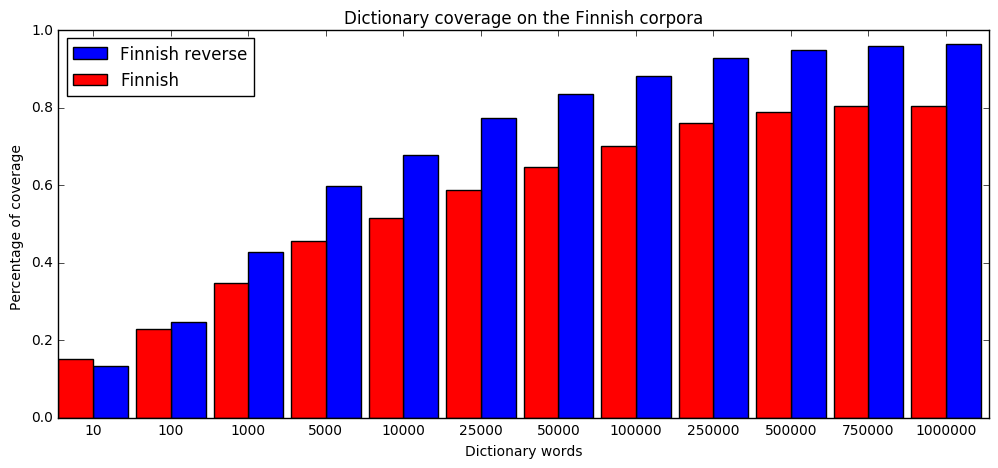

In [112]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index+bar_width, comm_sum_fn_norm_reverse,bar_width, label='Finnish reverse', color='b')
plt.bar(index, comm_sum_fn_norm,bar_width, label='Finnish', color='r')

plt.xticks(index+bar_width, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [46]:
def list_to_hist(_data,_dict,_list):
    """From the list creates the sablon hist"""
    max_y=sum(_data.values())
    max_x=len(_dict.keys())
    print([max_x,max_y])
    print(len(_list))

    comm_sum_norm_x=[10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000,750000,1000000] 
    comm_sum_norm=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1]
    comm_sum_norm[0]=_list[min(max_x-1,10)]/max_y
    comm_sum_norm[1]=_list[min(max_x-1,100)]/max_y
    comm_sum_norm[2]=_list[min(max_x-1,1000)]/max_y
    comm_sum_norm[3]=_list[min(max_x-1,5000)]/max_y
    comm_sum_norm[4]=_list[min(max_x-1,10000)]/max_y
    comm_sum_norm[5]=_list[min(max_x-1,25000)]/max_y
    comm_sum_norm[6]=_list[min(max_x-1,50000)]/max_y
    comm_sum_norm[7]=_list[min(max_x-1,100000)]/max_y
    comm_sum_norm[8]=_list[min(max_x-1,250000)]/max_y
    comm_sum_norm[9]=_list[min(max_x-1,500000)]/max_y
    comm_sum_norm[10]=_list[min(max_x-1,750000)]/max_y
    comm_sum_norm[11]=_list[min(max_x-1,1000000)]/max_y

    return comm_sum_norm, comm_sum_norm_x, max_x, max_y

In [123]:
a,b,c,d= list_to_hist(counter_fn_data,counter_fn_dict,comm_sum_fn)

[677096, 756337879]
677096


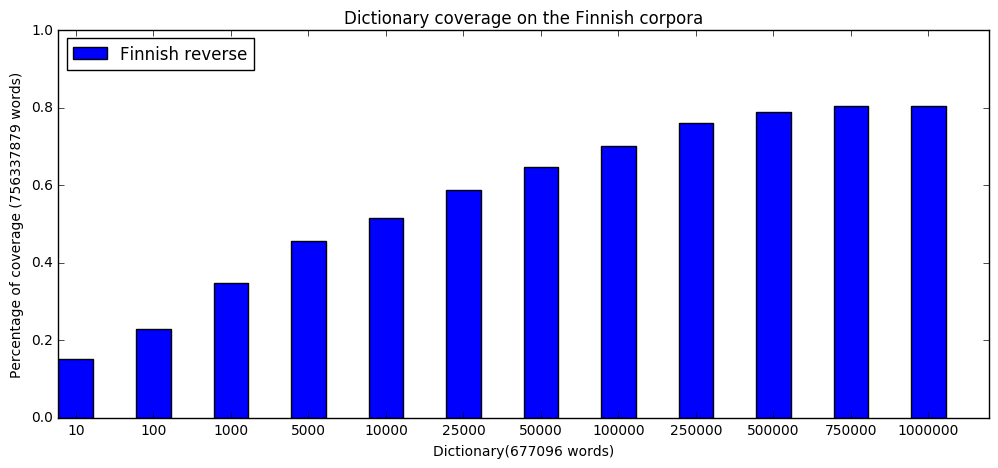

In [124]:
bar_width = 0.45
index = np.arange(np.size(a))
plt.figure(figsize=(12, 5))
plt.bar(index, a,bar_width, label='Finnish reverse', color='b')
plt.xticks(index+bar_width/2, b)
plt.xlabel('Dictionary({} words)'.format(c))
plt.ylabel('Percentage of coverage ({} words)'.format(d))
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

### French

In [35]:
counter_fr_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/fr-en/europarl-v7.fr-en.fr",
                                  clean=True, encoding="utf8")

In [36]:
counter_fr_data=counter_from_gz("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/frwac_preproc_first300klines.gz",
                               clean=True, encoding="latin1")

In [37]:
comm_sum_fr = coverage_commulate_sum_counters(counter_fr_data, counter_fr_dict.most_common())

In [38]:
comm_sum_fr_norm,comm_sum_fr_norm_x,max_x_fr,max_y_fr= list_to_hist(counter_fr_data,counter_fr_dict,comm_sum_fr)

[164013, 110826303]
164013


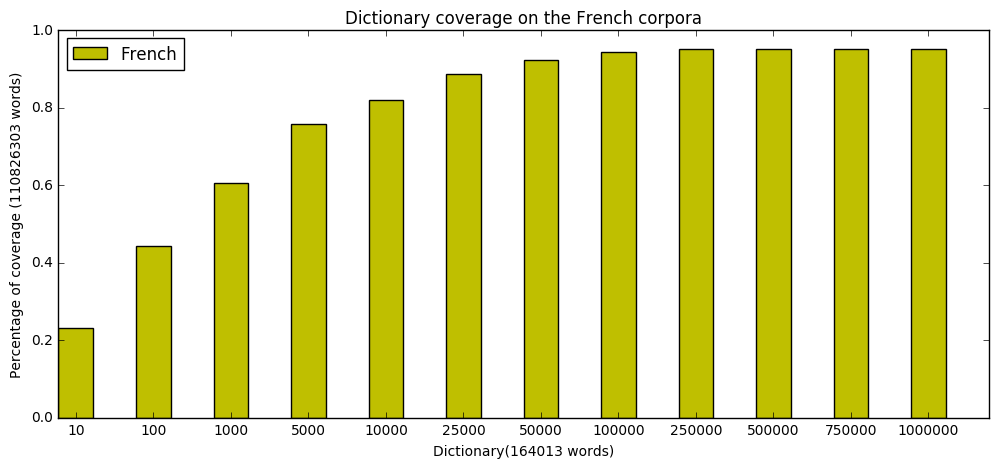

In [53]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fr_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fr_norm,bar_width, label='French', color='y')
plt.xticks(index+bar_width/2, comm_sum_fr_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_fr))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fr))
plt.title('Dictionary coverage on the French corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [40]:
comm_sum_fr_reverse = coverage_commulate_sum_counters(counter_fr_dict, counter_fr_data.most_common())

In [41]:
comm_sum_fr_norm_reverse,comm_sum_fr_norm_x_reverse,max_x_fr_reverse,max_y_fr_reverse=list_to_hist(
    counter_fr_dict,counter_fr_data,comm_sum_fr_reverse)

[998338, 52261426]
998338


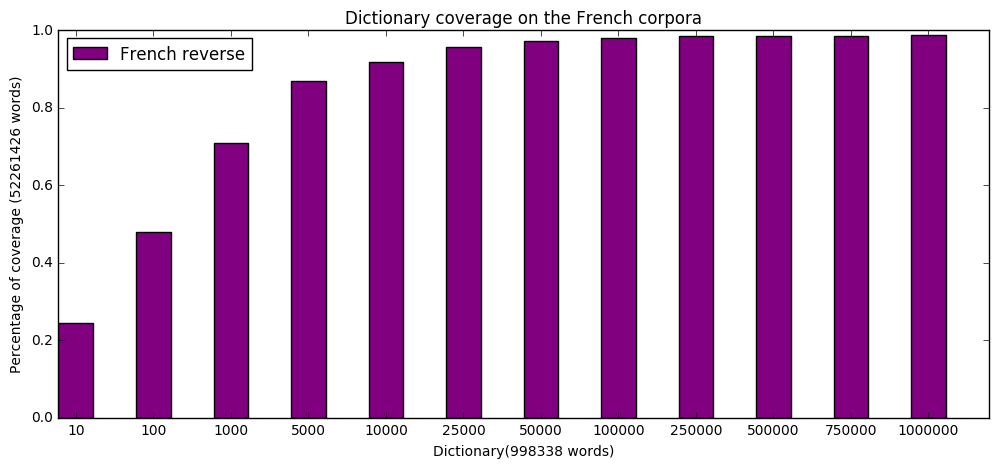

In [54]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fr_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fr_norm_reverse,bar_width, label='French reverse', color='purple')
plt.xticks(index+bar_width/2, comm_sum_fr_norm_x_reverse)
plt.xlabel('Dictionary({} words)'.format(max_x_fr_reverse))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fr_reverse))
plt.title('Dictionary coverage on the French corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

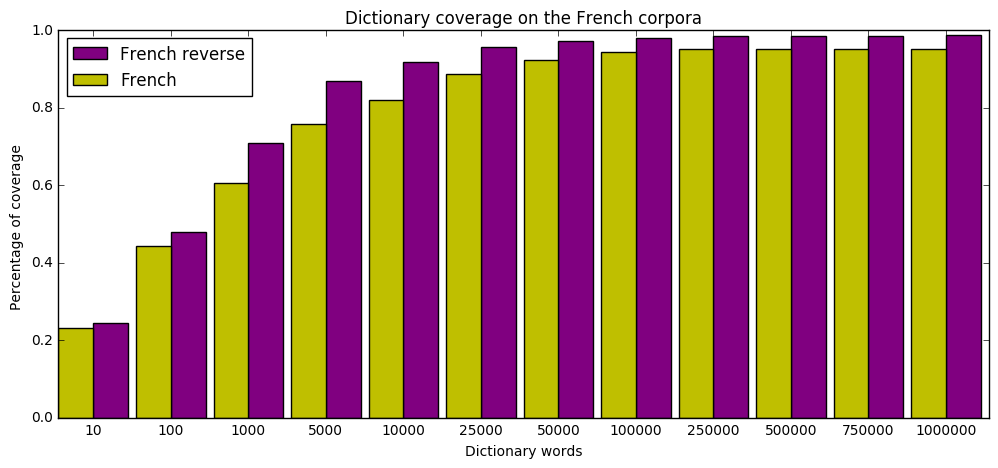

In [43]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fr_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index+bar_width, comm_sum_fr_norm_reverse,bar_width, label='French reverse', color='purple')
plt.bar(index, comm_sum_fr_norm,bar_width, label='French', color='y')

plt.xticks(index+bar_width, comm_sum_fr_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage on the French corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

### Italian

In [7]:
counter_it_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/it-en/europarl-v7.it-en.it",
                                  clean=True, encoding="utf8")

In [16]:
counter_it_data=counter_from_gz("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/itwac3_words.gz",
                               clean=True, encoding="latin1")

In [19]:
comm_sum_it = coverage_commulate_sum_counters(counter_it_data, counter_it_dict.most_common())

In [22]:
comm_sum_it_norm,comm_sum_it_norm_x,max_x_it,max_y_it= list_to_hist(counter_it_data,counter_it_dict,comm_sum_it)

[200560, 87556116]
200560


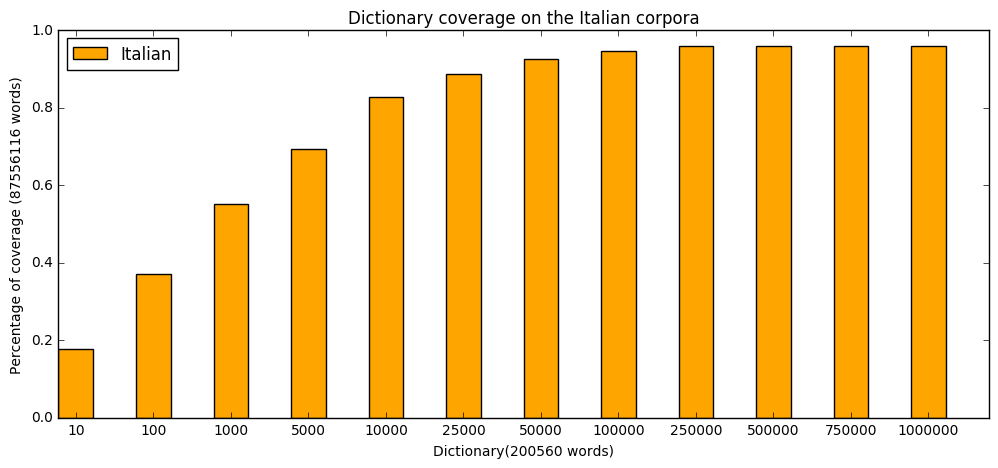

In [25]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_it_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_it_norm,bar_width, label='Italian', color='orange')
plt.xticks(index+bar_width/2, comm_sum_it_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_it))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_it))
plt.title('Dictionary coverage on the Italian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [26]:
comm_sum_it_reverse = coverage_commulate_sum_counters(counter_it_dict, counter_it_data.most_common())

In [27]:
comm_sum_it_norm_reverse,comm_sum_it_norm_x_reverse,max_x_it_reverse,max_y_it_reverse=list_to_hist(
    counter_it_dict,counter_it_data,comm_sum_it_reverse)

[759452, 47829087]
759452


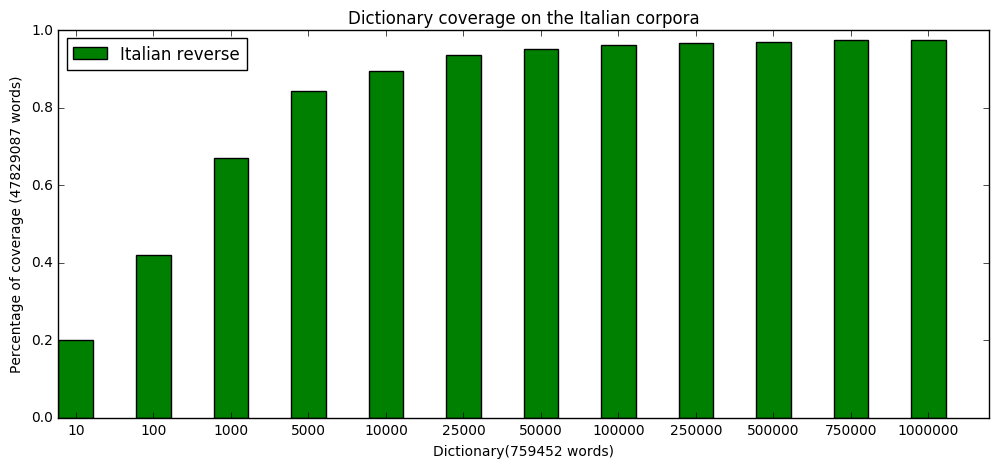

In [50]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_it_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_it_norm_reverse,bar_width, label='Italian reverse', color='g')
plt.xticks(index+bar_width/2, comm_sum_it_norm_x_reverse)
plt.xlabel('Dictionary({} words)'.format(max_x_it_reverse))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_it_reverse))
plt.title('Dictionary coverage on the Italian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

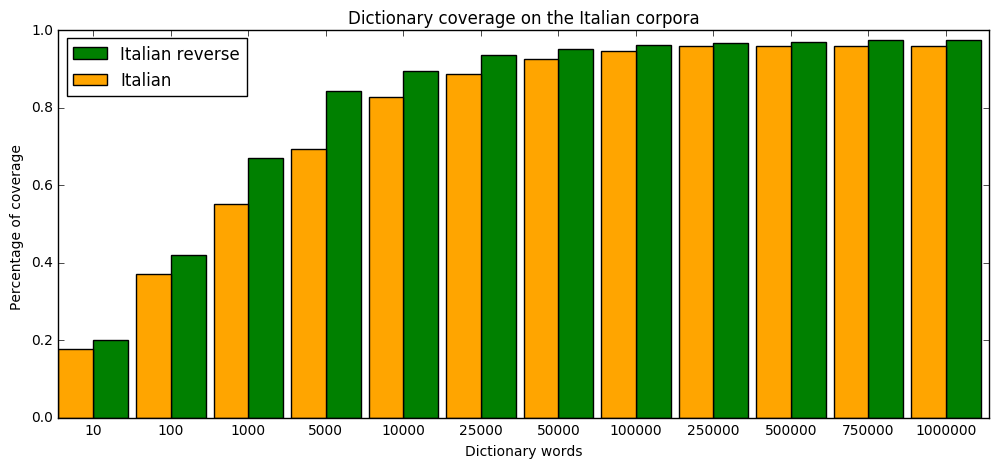

In [51]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_it_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index+bar_width, comm_sum_it_norm_reverse,bar_width, label='Italian reverse', color='green')
plt.bar(index, comm_sum_it_norm,bar_width, label='Italian', color='orange')

plt.xticks(index+bar_width, comm_sum_it_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage on the Italian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [45]:
comm_sum_fr_norm_reverse

[0.24503985023294236,
 0.478957845505402,
 0.7085306474415758,
 0.8675546090150698,
 0.9162078355841267,
 0.9568117984381062,
 0.9722495708402599,
 0.9797617462638697,
 0.983883390399642,
 0.985184809155418,
 0.9855936958168726,
 0.9859098563441419]

### Finnish

In [46]:
counter_fn_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/fi-en/europarl-v7.fi-en.fi",clean=True)

In [47]:
counter_fn_data=counter_from_gz("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/finnish.tok.gz",clean=True)

In [48]:
comm_sum_fn = coverage_commulate_sum_counters(counter_fn_data, counter_fn_dict.most_common())

In [49]:
comm_sum_fn_norm,comm_sum_fn_norm_x,max_x_fn,max_y_fn= list_to_hist(counter_fn_data,counter_fn_dict,comm_sum_fn)

[677096, 756337879]
677096


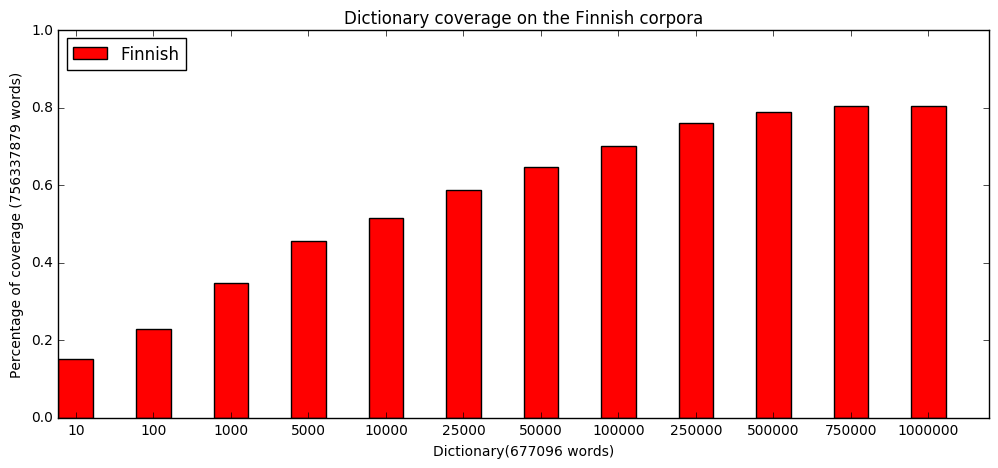

In [55]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm,bar_width, label='Finnish', color='r')
plt.xticks(index+bar_width/2, comm_sum_fn_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_fn))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fn))
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [56]:
comm_sum_fn_reverse = coverage_commulate_sum_counters(counter_fn_dict, counter_fn_data.most_common())

In [57]:
comm_sum_fn_norm_reverse,comm_sum_fn_norm_x_reverse,max_x_fn_reverse,max_y_fn_reverse=list_to_hist(
    counter_fn_dict,counter_fn_data,comm_sum_fn_reverse)

[13970703, 32189332]
13970703


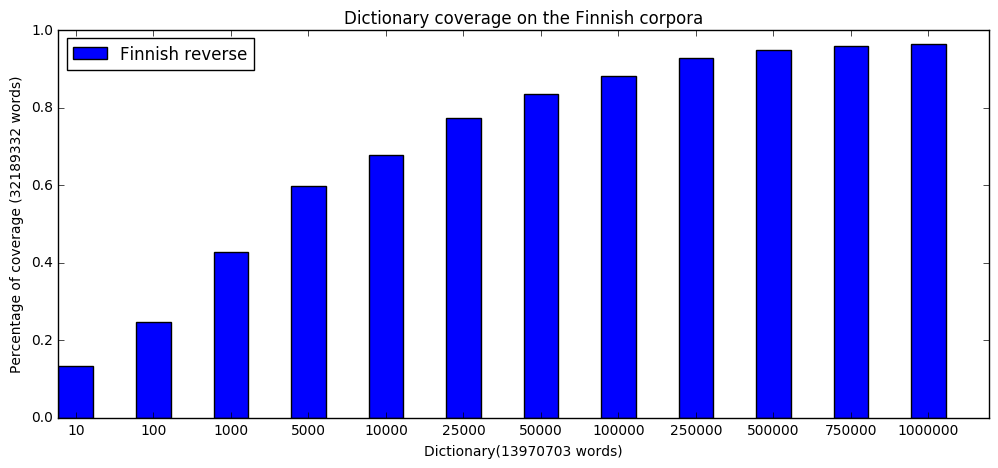

In [59]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm_reverse,bar_width, label='Finnish reverse', color='b')
plt.xticks(index+bar_width/2, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary({} words)'.format(max_x_fn_reverse))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_fn_reverse))
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

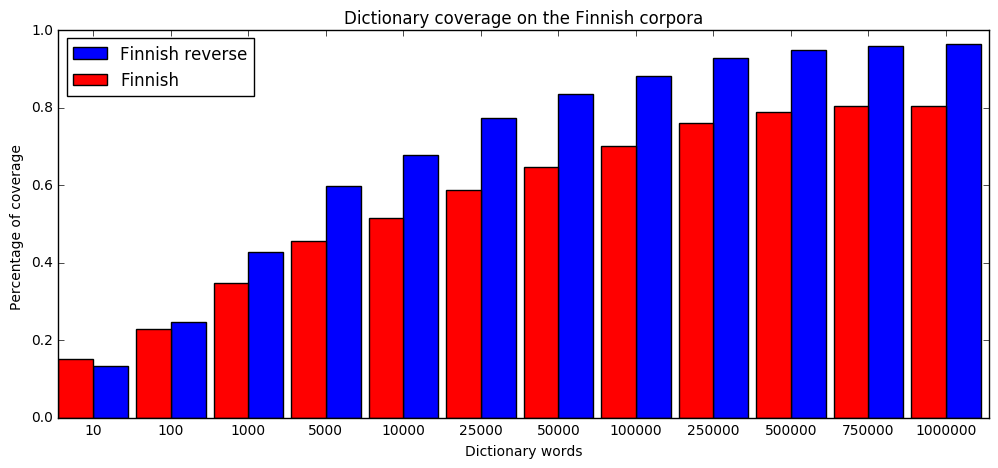

In [61]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_fn_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index+bar_width, comm_sum_fn_norm_reverse,bar_width, label='Finnish reverse', color='b')
plt.bar(index, comm_sum_fn_norm,bar_width, label='Finnish', color='r')

plt.xticks(index+bar_width, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage on the Finnish corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [63]:
comm_sum_fn_norm_reverse

[0.13165734535901522,
 0.2470283633099314,
 0.4275002662372739,
 0.5968082841855805,
 0.6780259994211747,
 0.7717085585994764,
 0.8355468202943758,
 0.8823565521645494,
 0.9272090517442239,
 0.9493609870499953,
 0.9589776202873672,
 0.9645504603823404]

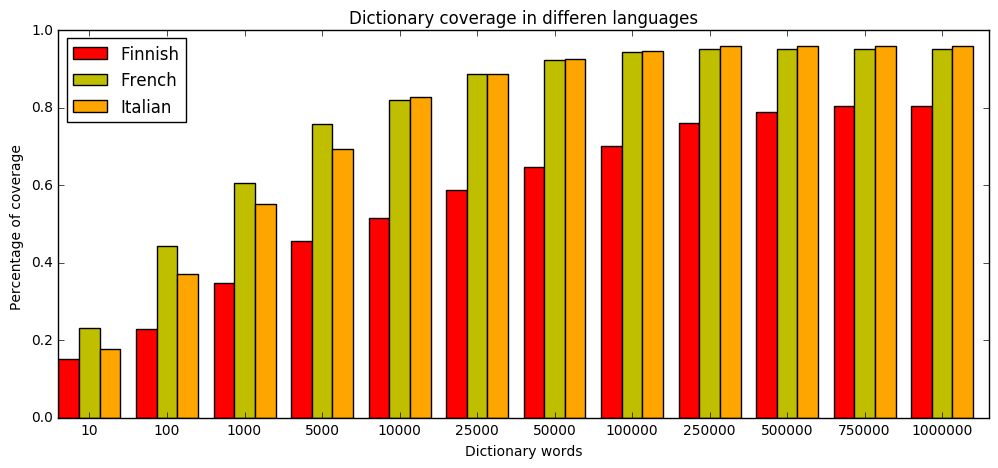

In [73]:
bar_width = 0.8
index = np.arange(np.size(comm_sum_fn_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm,bar_width/3, label='Finnish', color='r')
plt.bar(index+bar_width/3, comm_sum_fr_norm,bar_width/3, label='French', color='y')
plt.bar(index+bar_width/3*2, comm_sum_it_norm,bar_width/3, label='Italian', color='orange')


plt.xticks(index+bar_width/2, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage in differen languages')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

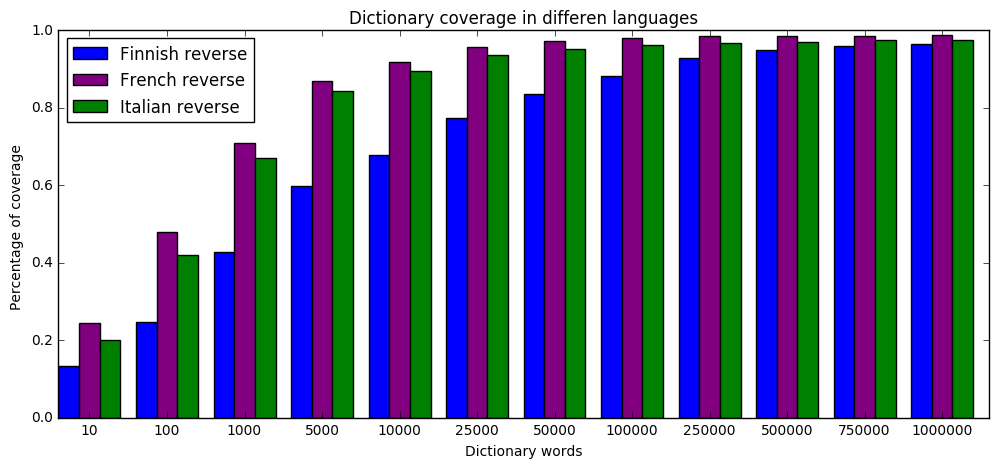

In [74]:
bar_width = 0.8
index = np.arange(np.size(comm_sum_fn_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_fn_norm_reverse,bar_width/3, label='Finnish reverse', color='b')
plt.bar(index+bar_width/3, comm_sum_fr_norm_reverse,bar_width/3, label='French reverse', color='purple')
plt.bar(index+bar_width/3*2, comm_sum_it_norm_reverse,bar_width/3, label='Italian reverse', color='g')


plt.xticks(index+bar_width/2, comm_sum_fn_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage in differen languages')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

## Hungarian

In [8]:
counter_hu_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/hu-en/europarl-v7.hu-en.hu",clean=True)

In [42]:
counter_hu_data = collections.Counter()
with open("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/web2.2-freq-sorted.txt", 'r',errors = 'ignore', encoding='latin2') as f:
        i = 0
        for line in f:
            i+=1
            words = line.split()
            if len(words) > 1:
                if (words[1].isdigit()):
                    counter_hu_data[cleaning(words[0])] += int(words[1])

In [44]:
comm_sum_hu = coverage_commulate_sum_counters(counter_hu_data, counter_hu_dict.most_common())

In [47]:
comm_sum_hu_norm,comm_sum_hu_norm_x,max_x_hu,max_y_hu= list_to_hist(counter_hu_data,counter_hu_dict,comm_sum_hu)

[312847, 1782720285]
312847


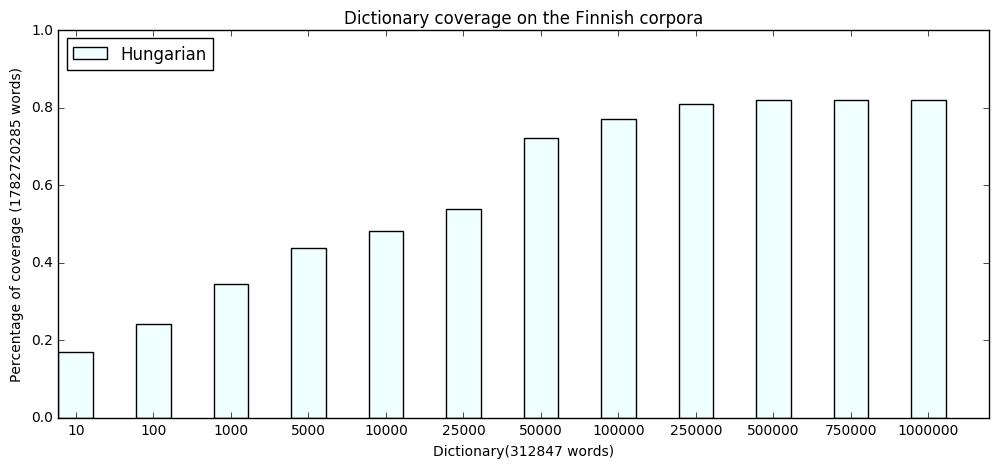

In [48]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_hu_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_hu_norm,bar_width, label='Hungarian', color='azure')
plt.xticks(index+bar_width/2, comm_sum_hu_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_hu))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_hu))
plt.title('Dictionary coverage on the Hungarian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

In [49]:
comm_sum_hu_reverse = coverage_commulate_sum_counters(counter_hu_dict, counter_hu_data.most_common())

In [50]:
comm_sum_hu_norm_reverse,comm_sum_hu_norm_x_reverse,max_x_hu_reverse,max_y_hu_reverse=list_to_hist(
    counter_hu_dict,counter_hu_data,comm_sum_hu_reverse)

[15221694, 12322209]
15221694


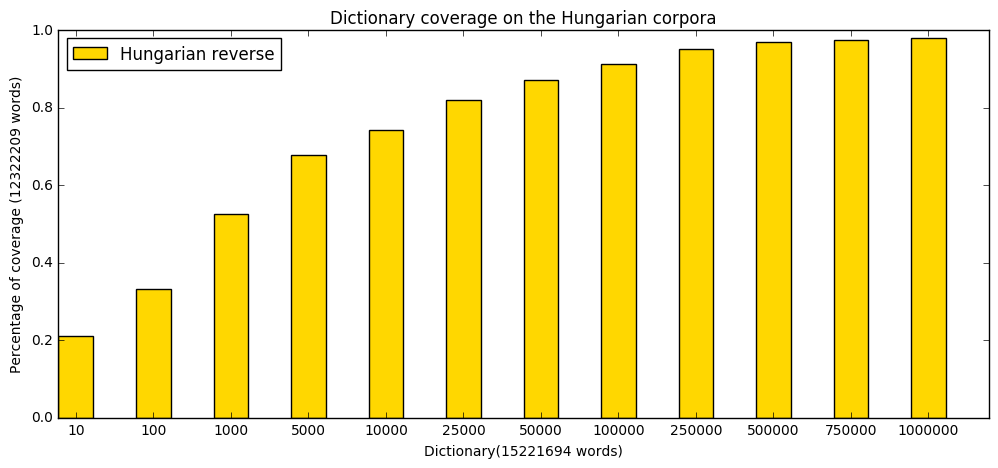

In [52]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_hu_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_hu_norm_reverse,bar_width, label='Hungarian reverse', color='gold')
plt.xticks(index+bar_width/2, comm_sum_hu_norm_x_reverse)
plt.xlabel('Dictionary({} words)'.format(max_x_hu_reverse))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_hu_reverse))
plt.title('Dictionary coverage on the Hungarian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

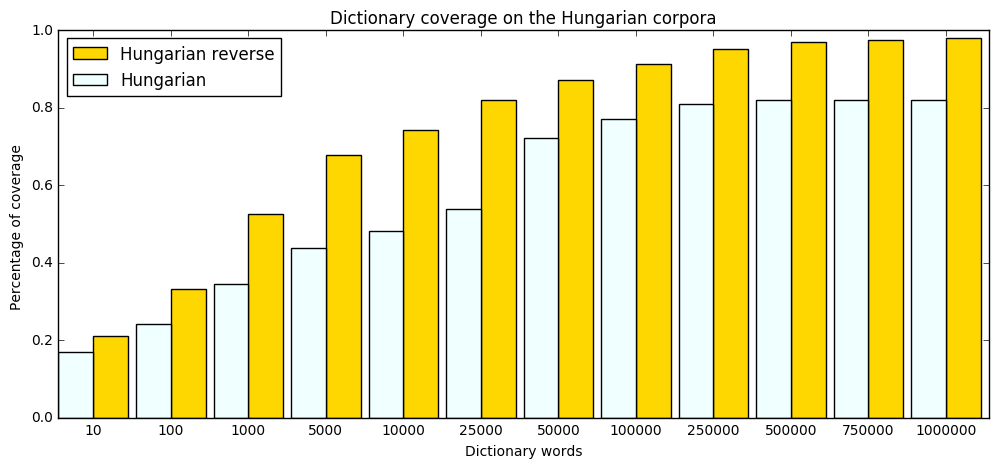

In [53]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_hu_norm_reverse))
plt.figure(figsize=(12, 5))
plt.bar(index+bar_width, comm_sum_hu_norm_reverse,bar_width, label='Hungarian reverse', color='gold')
plt.bar(index, comm_sum_hu_norm,bar_width, label='Hungarian', color='azure')

plt.xticks(index+bar_width, comm_sum_hu_norm_x_reverse)
plt.xlabel('Dictionary words')
plt.ylabel('Percentage of coverage ')
plt.title('Dictionary coverage on the Hungarian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()

## Cleanless

In [75]:
counter_it_nc_dict=counter_from_file("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/it-en/europarl-v7.it-en.it",
                                  clean=False, encoding="utf8")

In [76]:
counter_it_nc_data=counter_from_gz("/media/gergo/4A7D-71A3/Masolandok/BME/s5/tlab/itwac3_words.gz",
                               clean=False, encoding="latin1")

In [77]:
comm_sum_it_nc = coverage_commulate_sum_counters(counter_it_nc_data, counter_it_nc_dict.most_common())

In [78]:
comm_sum_it_nc_norm,comm_sum_it_nc_norm_x,max_x_it_nc,max_y_it_nc= list_to_hist(
    counter_it_nc_data,counter_it_nc_dict,comm_sum_it_nc)

[454093, 100083955]
454093


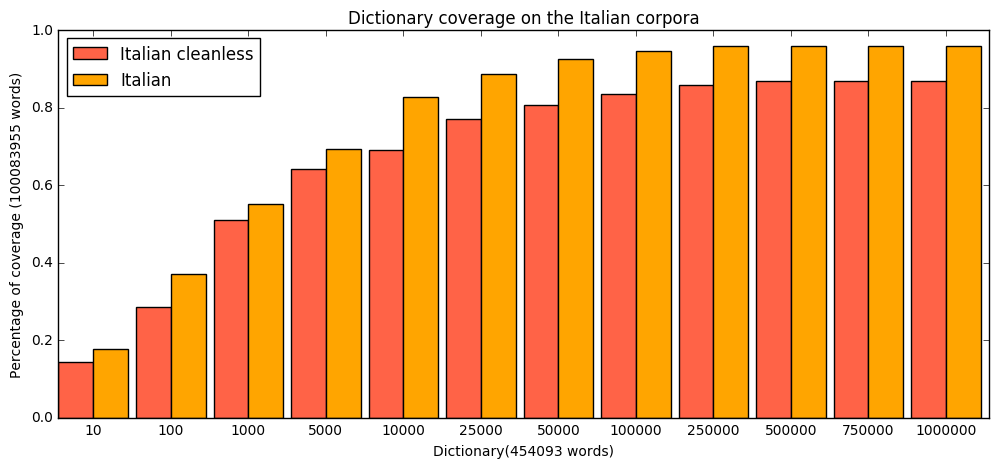

In [86]:
bar_width = 0.45
index = np.arange(np.size(comm_sum_it_nc_norm))
plt.figure(figsize=(12, 5))
plt.bar(index, comm_sum_it_nc_norm,bar_width, label='Italian cleanless', color='tomato')
plt.bar(index+bar_width, comm_sum_it_norm,bar_width, label='Italian', color='orange')
plt.xticks(index+bar_width, comm_sum_it_nc_norm_x)
plt.xlabel('Dictionary({} words)'.format(max_x_it_nc))
plt.ylabel('Percentage of coverage ({} words)'.format(max_y_it_nc))
plt.title('Dictionary coverage on the Italian corpora')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.show()